# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [ ]:
def f(x):
  return x ** 2

In [ ]:
def dfdx(x):
  return 2 * x

In [ ]:
import torch as th

In [ ]:
x = th.tensor([0, 1, 2])
f(x)

tensor([0, 1, 4])

In [ ]:
dfdx(x)

tensor([0, 2, 4])

In [ ]:
import sympy

In [ ]:
x = sympy.symbols("x")
f = x ** 2
dfdx = sympy.diff(f, x)
dfdx

2*x

In [ ]:
dfdx.evalf(subs={x: 1})

2.00000000000000

In [ ]:
def f(x):
  return x ** 2

In [ ]:
def dfdx(f, x, h=1e-5):
  return (f(x+h) - f(x)) / h

In [ ]:
dfdx(f, 1)

2.00001000001393

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
z = y.sum() # x1^2 + x2^2 + x^3
z.backward() # dz/dx
x, x.grad

(tensor([0.0000, 4.5000, 9.0000], requires_grad=True), tensor([ 0.,  9., 18.]))

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
# z = y1+y2+y3
dzdy = th.ones(3)

# y.backward(gradient=dzdy)
y.backward(gradient=th.tensor([1, 1, 1]))
x.grad

tensor([ 0., 18., 54.])

In [ ]:
x1, x2, x3 = x
J = th.tensor([
  [2*x1, 0, 0],
  [0, 2*x2, 0],
  [0, 0, 2*x3]
])
J @ dzdy

tensor([ 0.,  9., 18.])

## Задачи для самостоятельного решения

In [15]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

<p class="task" id="1"></p>

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [93]:
def f(x):
    return np.sin(x) / (np.log(x) + 1)

In [94]:
def dfdx(x):
    return ((np.log(x) + 1) * np.cos(x) - np.sin(x) / x) / ((np.log(x) + 1) ** 2)

In [95]:
x = np.linspace(0.0001, 10, 1000)

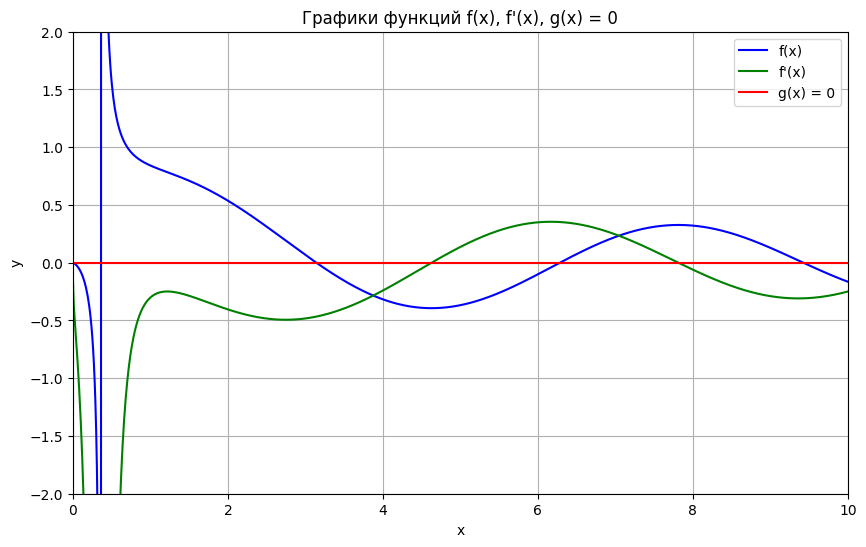

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='f(x)', color='blue')
plt.plot(x, dfdx(x), label="f'(x)", color='green')
plt.axhline(0, color='red', label='g(x) = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.title('Графики функций f(x), f\'(x), g(x) = 0')
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.show()


<p class="task" id="2"></p>

2\. Дана функция $f(x)$. Найдите (используя символьные вычисления) производную данной функции $f'(x)$. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [97]:
x = sp.symbols('x')
f_x = sp.sin(x) / (sp.log(x) + 1)
dfdx = sp.diff(f_x, x)

In [98]:
f = sp.lambdify(x, f_x, 'numpy')
df = sp.lambdify(x, dfdx, 'numpy')

In [99]:
x_values = np.linspace(0.0001, 10, 1000)

In [100]:
f_values = f(x_values)
df_values = df(x_values)


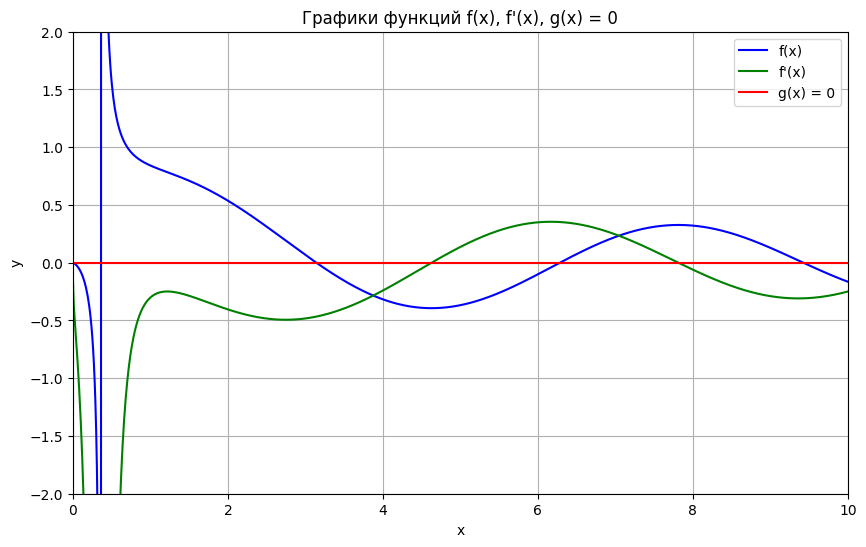

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label='f(x)', color='blue')
plt.plot(x_values, df_values, label="f'(x)", color='green')
plt.axhline(0, color='red', label='g(x) = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.title('Графики функций f(x), f\'(x), g(x) = 0')
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.show()


<p class="task" id="3"></p>

3\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на полуинтервале (0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [102]:
def f(x):
    return np.sin(x) / (np.log(x) + 1)


In [103]:
def dfdx(func, x, h=1e-5):
    n = len(x)
    df = np.zeros(n-1)
    for i in range(n-1):
        df[i] = (func(x[i] + h) - func(x[i])) / h
    return x[:-1], df

In [104]:
x = np.linspace(0.0001, 10, 1000)

In [105]:
x_values, df_values = dfdx(f, x)

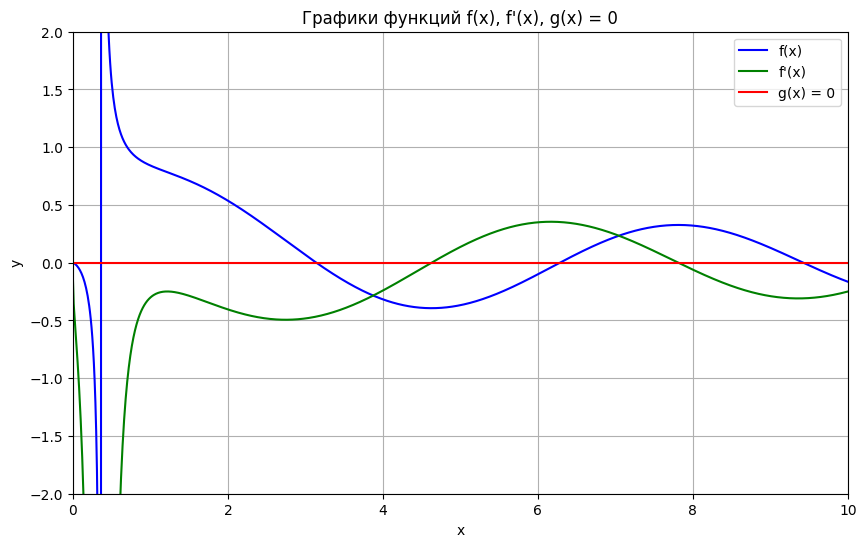

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='f(x)', color='blue')
plt.plot(x_values, df_values, label="f'(x)", color='green')
plt.axhline(0, color='red', label='g(x) = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.title('Графики функций f(x), f\'(x), g(x) = 0')
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.show()

<p class="task" id="4"></p>

4\. Найдите локальный минимум функции $f(x)$ при помощи метода градиетного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [107]:
def f(x):
    return np.sin(x) / (np.log(x) + 1)

def dfdx(x):
    return (np.cos(x) * (np.log(x) + 1) - np.sin(x) / x) / ((np.log(x) + 1) ** 2)

In [108]:
def gd_min(x0, lr = 0.1, tolerance = 1e-6, max_iter= 1000):
    x = x0
    for _ in range(max_iter):
        gradient = df(x)
        x_new = x - lr * gradient
        if abs(x_new - x) < tolerance:
            break
        x = x_new
    return x


def gd_max(x0, lr = 0.1, tolerance = 1e-6, max_iter= 1000):
    x = x0
    for _ in range(max_iter):
        gradient = df(x)
        x_new = x + lr * gradient
        if abs(x_new - x) < tolerance:
            break
        x = x_new
    return x

In [109]:
x0_min = 4.0
x0_max = 9.0

In [110]:
min_x = gd_min(x0_min)
max_x = gd_max(x0_max)

In [111]:
min_value = f(min_x)
max_value = f(max_x)


In [112]:
print(f'Локальный минимум: x = {min_x}, f(x) = {min_value}')
print(f'Локальный максимум: x = {max_x}, f(x) = {max_value}')

Локальный минимум: x = 4.627216359485043, f(x) = -0.39351995590999905
Локальный максимум: x = 7.812144592754304, f(x) = 0.3269730845385417


<p class="task" id="5"></p>

5\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [113]:
import torch

In [114]:
def f(x):
    return torch.sin(x) / (torch.log(x) + 1)

In [115]:
x_values = torch.linspace(0.0001, 10, 1000, requires_grad=True)

In [116]:
fx = f(x_values)
fx.backward(torch.ones_like(fx))
dfx = x_values.grad



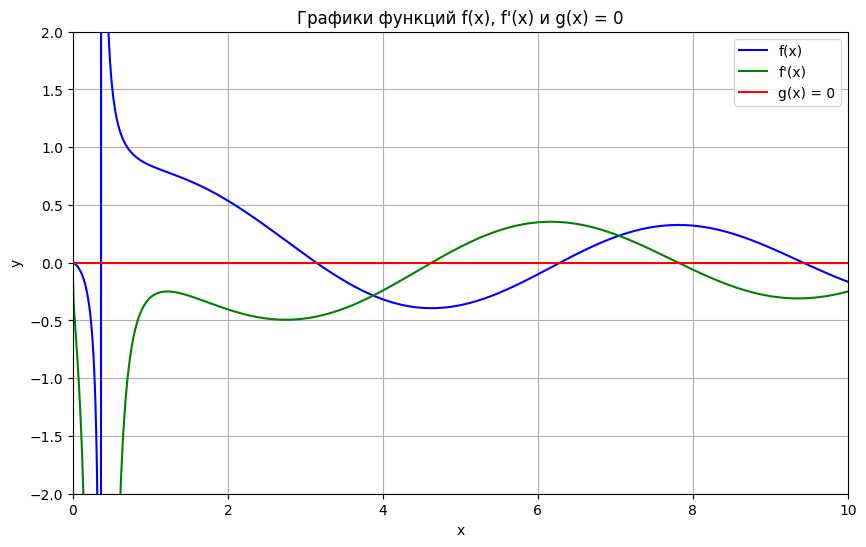

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(x_values.detach().numpy(), fx.detach().numpy(), label='f(x)', color='blue')
plt.plot(x_values.detach().numpy(), dfx.detach().numpy(), label="f'(x)", color='green')
plt.axhline(0, color='red', label='g(x) = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.title('Графики функций f(x), f\'(x) и g(x) = 0')
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.show()

<p class="task" id="6"></p>

6\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

In [124]:
def f(x):
    return torch.sin(torch.cos(x))


In [125]:
x_values = torch.linspace(0, 10, 1000, requires_grad=True)

In [126]:
fx = f(x_values)
fx.backward(torch.ones_like(fx))
dfx_1 = x_values.grad


In [127]:
dfx_2 = torch.cos(torch.cos(x_values)) * (-torch.sin(x_values))

In [130]:
(dfx_1 == dfx_2).unique()

tensor([True])

## Обратная связь
- [ ] Хочу получить обратную связь по решению